# 3.决策树

## 调包

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import operator
%matplotlib inline

## 3.1.决策树的构造
### 3.1.1.计算给定数据集的香农熵
信息量为概率的负对数，概率越小，信息量越大
$$l(x_{i})=-log_{2}p(x_{i})$$
香农熵为信息量的期望，统计平均
$$H=E[l(x_{i})]=-\sum_{i=1}^{n}p(x_{i})\cdot log_{2}p(x_{i})$$

In [4]:
from math import log

def calcShannonEnt(dataSet):
    """
    计算香农熵
    参数：
        dataSet -- 数据集，包含不同类型
    输出：
        shannonEnt -- 香农熵
    """
    #求数据集大小
    numEntries = len(dataSet)
    #新建一个用于统计各个类型数目的字典
    labelCounts = {}
    #遍历数据集中的每个数据
    for featVec in dataSet:
        #类型为数据中的最后一项
        currentLabel = featVec[-1]
        #如果之前没有记录该类型
        if currentLabel not in labelCounts.keys():
            #添加新的一项记录
            labelCounts[currentLabel] = 0
        #计数
        labelCounts[currentLabel] += 1
    #初始化香农熵
    shannonEnt = 0.0
    #遍历所有类型
    for key in labelCounts:
        #计算概率，古典概型
        prob = np.float(labelCounts[key])/numEntries
        #根据公式计算香农熵
        shannonEnt -= prob * log(prob, 2)
    return shannonEnt

### 3.1.2.验证香农熵函数

In [5]:
#创造点数据
def createDataSet():
    """
    创造测试数据
    参数：
        无
    输出：
        dataSet -- 数据集
        labels -- 标签
    """
    dataSet = [[1, True, 'yes'],
              [1, True, 'yes'],
              [1, False, 'no'],
              [0, True, 'no'],
              [0, True, 'no']]
    labels = ['no surfacing', 'flippers']
    return dataSet, labels

In [13]:
myDat, labels = createDataSet()
print("myDat = {}".format(myDat))
print("myDat的香农熵 = {}".format(calcShannonEnt(myDat)))
myDat[0][-1] = 'maybe'
print("修改后的myDat = {}".format(myDat))
print("修改后的myDat的香农熵 = {}".format(calcShannonEnt(myDat)))

myDat = [[1, True, 'yes'], [1, True, 'yes'], [1, False, 'no'], [0, True, 'no'], [0, True, 'no']]
myDat的香农熵 = 0.9709505944546686
修改后的myDat = [[1, True, 'maybe'], [1, True, 'yes'], [1, False, 'no'], [0, True, 'no'], [0, True, 'no']]
修改后的myDat的香农熵 = 1.3709505944546687


### 3.1.3.划分数据集

In [14]:
def splitDataSet(dataSet, axis, value):
    """
    按给定特征划分数据集
    参数：
        dataSet -- 待划分的数据集
        axis -- 划分的参照特征
        value -- 分界线的特征值
    """
    #新建存放划分后数据集的列表
    retDataSet = []
    #遍历数据集中的书籍
    for featVec in dataSet:
        #找到划分界限
        if featVec[axis] == value:
            #取之前的特征，不包括参照特征
            reducedFeatVec = featVec[:axis]
            #取之后的特征，不包括参照特征
            reducedFeatVec.extend(featVec[axis+1:])
            #添加到划分数据集中
            retDataSet.append(reducedFeatVec)
    return retDataSet

### 3.1.4.测试划分数据集函数

In [15]:
myDat, labels = createDataSet()
print("myDat = {}".format(myDat))
print("myDat第一个特征为1的划分 = {}".format(splitDataSet(myDat,0,1)))
print("myDat第一个特征为0的划分 = {}".format(splitDataSet(myDat,0,0)))

myDat = [[1, True, 'yes'], [1, True, 'yes'], [1, False, 'no'], [0, True, 'no'], [0, True, 'no']]
myDat第一个特征为1的划分 = [[True, 'yes'], [True, 'yes'], [False, 'no']]
myDat第一个特征为0的划分 = [[True, 'no'], [True, 'no']]


### 3.1.5选择最好的数据集划分方式

In [16]:
def chooseBestFeatureToSplit(dataSet):
    """
    选择最好的划分参照特征，也就是使得信息增益最大的划分方式
    参数：
        dataSet -- 数据集
    返回：
        bestFeature -- 最好的数据集
    """
    #求特征数，-1是去掉标签
    numFeatures = len(dataSet[0]) - 1
    #求数据集的香农熵
    baseEntropy = calcShannonEnt(dataSet)
    #初始化最佳信息增益，和最好的参照特征
    bestInfoGain = 0.0
    bestFeature = -1
    #遍历每个特征
    for i in range(numFeatures):
        #取每个数据的第i个特征值
        featList = [example[i] for example in dataSet]
        #把这些特征值作为一个集合
        uniqueVals = set(featList)
        #初始化划分后的熵
        newEntropy = 0.0
        #遍历集合中的特征值
        for value in uniqueVals:
            #取第i个特征值为value子集
            subDataSet = splitDataSet(dataSet, i, value)
            #计算概率
            prob = len(subDataSet) / np.float(len(dataSet))
            #计算划分后的熵，为各个子集熵的期望
            newEntropy += prob * calcShannonEnt(subDataSet)
        #计算信息增益
        infoGain = baseEntropy - newEntropy
        #如果当前以i特征划分得到的信息增益大于之前的最大值
        if (infoGain > bestInfoGain):
            #加冕为王
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

### 3.1.6.测试选择最佳划分方式的函数

In [17]:
myDat, labels = createDataSet()
print("myDat = {}".format(myDat))
print("最好的划分参照特征是，特征“{}”".format(chooseBestFeatureToSplit(myDat)))

myDat = [[1, True, 'yes'], [1, True, 'yes'], [1, False, 'no'], [0, True, 'no'], [0, True, 'no']]
最好的划分参照特征是，特征“0”


### 3.1.7.递归构建决策树

In [18]:
def majorityCnt(classList):
    """
    求出现次数最多分类的名称
    参数：
        classList -- 类列表
    返回：
        sortedClassCount[0][0] -- 最多分类的名称
    """
    #新建一个类计数器，字典
    classCount = {}
    #遍历类列表
    for vote in classList:
        #如果第一次遇到一个类
        if vote not in classCount.keys():
            #新建一个类计数器
            classCount[vote] = 0
        #计数+1
        classCount[vote] += 1
        #排序
    sortedClassCount = sorted(classCount.iteritems(), key = operator.itemgetter(1), reverse = True)
    return sortedClassCount[0][0]

In [28]:
def createTree(dataSet, featLabels):
    """
    创建决策树的递归函数
    参数：
        dataSet -- 数据集
        labels -- 标签
    返回：
        myTree -- 创建的决策树
    """
    #复制一份特征列表，因为后边要对labels做del，会改变原参数
    labels = list.copy(featLabels)
    #得到类列表
    classList = [example[-1] for example in dataSet]
    #如果类列表中只有一类
    if classList.count(classList[0]) == len(classList):
        #返回该类，结束函数
        return classList[0]
    #如果数据只有类，没有数据，也就是用尽所有特征也没法把数据划分成单一类
    if len(dataSet[0]) == 1:
        #返回最多的那一类，结束函数
        return majorityCnt(classList)
    #最佳分类特征的序号
    bestFeat = chooseBestFeatureToSplit(dataSet)
    #最佳分类标签
    bestFeatLabel = labels[bestFeat]
    #初始化决策树，字典型
    myTree = {bestFeatLabel:{}}
    #从列表中删除划分过的类
    del(labels[bestFeat])
    #得到特征值
    featValues = [example[bestFeat] for example in dataSet]
    #值的集合
    uniqueVals = set(featValues)
    #遍历所有值
    for value in uniqueVals:
        #剩余的类别名称
        subLabels = labels[:]
        #调用子节点递归函数
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    #返回给父节点迭代函数
    return myTree

### 3.1.8.测试建立决策树的递归函数

In [29]:
myDat, labels = createDataSet()
myTree = createTree(myDat, labels)
print("myTree = {}".format(myTree))

myTree = {'no surfacing': {0: 'no', 1: {'flippers': {False: 'no', True: 'yes'}}}}


## 3.2.在Python中使用Matplotlib注解绘制树形图
### 3.2.1.Matplotlib注解

In [48]:
#图形设置
decisionNode = dict(boxstyle = "sawtooth", fc = "0.8")
leafNode = dict(boxstyle = "round4", fc = "0.8")
arrow_args = dict(arrowstyle = "<-")

In [54]:
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    """
    绘制节点
    参数：
        nodeTxt -- 点的内容
        centerPt -- 中心点
        parentPt -- 父节点
        nodeType -- 点类型
    返回：
        无
    """
    createPlot.ax1.annotate(nodeTxt, xy = parentPt, \
            xycoords = 'axes fraction', xytext = centerPt, \
            textcoords = 'axes fraction', va = "center", \
            ha = "center", bbox = nodeType, arrowprops = arrow_args)

In [58]:
def createPlot():
    """
    进行绘制
    参数：
        无
    返回：
        无
    """
    fig = plt.figure(1, facecolor = 'white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111, frameon = False)
    plotNode('decisionNode', (0.5, 0.1), (0.1, 0.5), decisionNode)
    plotNode('leafNode', (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()

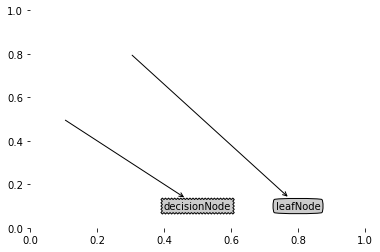

In [59]:
createPlot()

### 3.2.2.构造注解树

In [67]:
def getNumLeafs(myTree):
    """
    获取叶节点的数目
    参数：
        myTree -- 决策树
    返回：
        numLeafs -- 叶节点的数目
    """
    #初始化叶节点的数目
    numLeafs = 0
    #根节点的类名称
    firstStr = list(myTree.keys())[0]
    #根节点对应的字典
    secondDict = myTree[firstStr]
    #遍历字典中的每一个关键词
    for key in list(secondDict.keys()):
        #如果关键词下存放的还是字典，说明不是叶节点
        if type(secondDict[key]).__name__ == 'dict':
            #递归调用函数，统计子节点中的叶节点数目
            numLeafs += getNumLeafs(secondDict[key])
        #是叶节点，计数器++
        else:
            numLeafs += 1
    return numLeafs

In [70]:
def getTreeDepth(myTree):
    """
    获得树的深度
    参数：
        myTree -- 决策树
    返回：
        maxDepth -- 树的深度
    """
    #初始化树的深度
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in list(secondDict.keys()):
        if type(secondDict[key]).__name__ == 'dict':
            #深度 = 1 + 子树的深度
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth

In [65]:
def retrieveTree(i):
    listOfTrees = [{'no surfacing': {0: 'no', 1:{'flippers': \
                    {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'flippers': \
                    {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                  ]
    return listOfTrees[i]

In [71]:
print("retrieveTree(1) = {}".format(retrieveTree(1)))
myTree = retrieveTree(0)
print("叶节点数 = {}".format(getNumLeafs(myTree)))
print("层数 = {}".format(getTreeDepth(myTree)))

retrieveTree(1) = {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
叶节点数 = 3
层数 = 2


### 3.2.3绘制决策树

In [73]:
def plotMidText(cntrPt, parentPt, txtString):
    """
    绘制注释
    参数：
        cntrPt -- 中心点位置
        parentPt -- 父节点位置
        txtString -- 文本字符串
    返回：
        无
    """
    #绘制注释的坐标位置
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    #绘制注释
    createPlot.ax1.text(xMid, yMid, txtString)

In [78]:
def plotTree(myTree, parentPt, nodeTxt):
    """
    绘制决策树
    参数：
        myTree -- 决策树
        parentPt -- 父节点位置
        nodeTxt -- 节点文本信息
    返回：
        无
    """
    #求树的叶节点数和层数
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0 + np.float(numLeafs)) / 2.0 \
             / plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    for key in list(secondDict.keys()):
        if type(secondDict[key]).__name__ == 'dict':
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff),\
                    cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD

In [76]:
def createPlotTree(inTree):
    """
    进行绘制
    参数：
        inTree -- 决策树
    返回：
        无
    """
    fig = plt.figure(1, facecolor = 'white')
    fig.clf()
    axprops = dict(xticks = [], yticks = [])
    createPlot.ax1 = plt.subplot(111, frameon = False, **axprops)
    plotTree.totalW = np.float(getNumLeafs(inTree))
    plotTree.totalD = np.float(getTreeDepth(inTree))
    plotTree.xOff = -0.5 / plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()

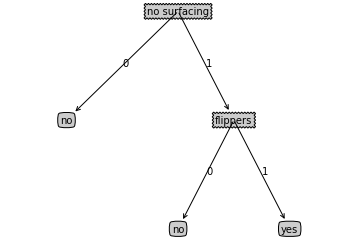

In [79]:
myTree = retrieveTree(0)
createPlotTree(myTree)

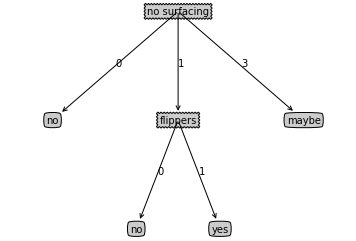

In [80]:
myTree['no surfacing'][3] = 'maybe'
createPlotTree(myTree)

## 3.3.测试和存储分类器
### 3.3.1.使用决策树执行分类

In [30]:
def classify(inputTree, featLabels, testVec):
    """
    使用决策树执行分类，递归函数
    参数：
        inputTree -- 输入决策树，字典
        featLabels -- 特征名的列表
        testVec -- 测试向量
    返回：
        classLabel -- 预测分类
    """
    #根节点类型
    firstStr = list(inputTree.keys())[0]
    #根节点对应字典
    secondDict = inputTree[firstStr]
    #求根特征对应的特征序号
    featIndex = featLabels.index(firstStr)
    #遍历所有关键词
    for key in secondDict.keys():
        #匹配到了待分类向量的第featIndex个特征
        if testVec[featIndex] == key:
            #不是叶子节点，节点元素是一个字典
            if type(secondDict[key]).__name__ == 'dict':
                #对这个字典递归调用分类函数
                classLabel = classify(secondDict[key],featLabels, testVec)
            else:
                classLabel = secondDict[key]
    return classLabel

### 3.3.2.测试决策树分类函数

In [33]:
myDat, labels = createDataSet()
print("myDat = {}".format(myDat))
print("labels = {}".format(labels))
myTree = createTree(myDat, labels)
print("myTree = {}".format(myTree))
print("[1, 0]属于{}".format(classify(myTree, labels, [1, 0])))
print("[1, 1]属于{}".format(classify(myTree, labels, [1, 1])))

myDat = [[1, True, 'yes'], [1, True, 'yes'], [1, False, 'no'], [0, True, 'no'], [0, True, 'no']]
labels = ['no surfacing', 'flippers']
myTree = {'no surfacing': {0: 'no', 1: {'flippers': {False: 'no', True: 'yes'}}}}
[1, 0]属于no
[1, 1]属于yes


### 3.3.3.存储读取决策树

In [44]:
def storeTree(inputTree, filename):
    """
    存储决策树
    参数：
        inputTree -- 输入决策树
        filename -- 文件名
    返回：
        无 -- 直接存储文件
    """
    import pickle
    #可写的文件指针
    fw = open(filename, 'wb')
    #存储决策树
    pickle.dump(str(inputTree), fw)
    #关闭指针
    fw.close()

def grabTree(filename):
    """
    提取决策树
    参数：
        filename -- 文件名
    返回：
        tree -- 读取到的决策树
    """
    import pickle
    #打开只读文件指针
    fr = open(filename, 'rb')
    #载入文件内容
    tree = pickle.load(fr)
    return tree

In [45]:
storeTree(myTree, "classifierStorage.txt")
loadedTree = grabTree("classifierStorage.txt")
print("读取到的决策树 = {}".format(loadedTree))

读取到的决策树 = {'no surfacing': {0: 'no', 1: {'flippers': {False: 'no', True: 'yes'}}}}


## 3.4.预测隐形眼镜类型
### 3.4.1.读取数据

In [46]:
fr = open("lenses.txt")
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']

### 3.4.2.生成决策树

In [47]:
lensesTree = createTree(lenses, lensesLabels)
print("lensesTree = {}".format(lensesTree))

lensesTree = {'tearRate': {'reduced': 'no lenses', 'normal': {'astigmatic': {'yes': {'prescript': {'myope': 'hard', 'hyper': {'age': {'presbyopic': 'no lenses', 'pre': 'no lenses', 'young': 'hard'}}}}, 'no': {'age': {'presbyopic': {'prescript': {'myope': 'no lenses', 'hyper': 'soft'}}, 'pre': 'soft', 'young': 'soft'}}}}}}


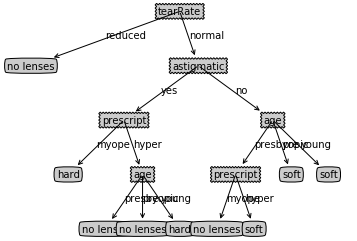

In [81]:
createPlotTree(lensesTree)